In [1]:

import os, random, shutil
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from glob import glob
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications import InceptionResNetV2
from PIL import Image 

print('a')

a


In [2]:
path_train_new = os.path.join('./data/train_by_style_type/img_style/')

train_list = glob(os.path.join(path_train_new, '*', '*.jpg'))

print(len(train_list))

dir_list = sorted(glob(os.path.join(path_train_new, '*')))

print(dir_list)

train_dir = './data/train_by_style_type/img_style/'

tmplist = []
for i in dir_list:
    tmplist.append(i[37:])

print(tmplist)

146147
['./data/train_by_style_type/img_style/americana', './data/train_by_style_type/img_style/angeles', './data/train_by_style_type/img_style/art', './data/train_by_style_type/img_style/athletic', './data/train_by_style_type/img_style/audrey', './data/train_by_style_type/img_style/babe', './data/train_by_style_type/img_style/babydoll', './data/train_by_style_type/img_style/barbie', './data/train_by_style_type/img_style/baseball', './data/train_by_style_type/img_style/basic', './data/train_by_style_type/img_style/basquiat', './data/train_by_style_type/img_style/beach', './data/train_by_style_type/img_style/beatles', './data/train_by_style_type/img_style/bed', './data/train_by_style_type/img_style/bella', './data/train_by_style_type/img_style/bike', './data/train_by_style_type/img_style/biker', './data/train_by_style_type/img_style/blah', './data/train_by_style_type/img_style/blurred', './data/train_by_style_type/img_style/boho', './data/train_by_style_type/img_style/bold', './data/tra

In [3]:
train_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)

batch_size=20

# classes=[str(x) for x in range(len(dir_list))]
classes = tmplist

print(classes)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    classes=classes,
    target_size=(299,299),
    batch_size=batch_size, 
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    classes=classes,
    target_size=(299,299),
    batch_size=batch_size, 
    class_mode='categorical',
    subset='validation')

nr_of_classes = len(train_generator.class_indices)
print(nr_of_classes)

['americana', 'angeles', 'art', 'athletic', 'audrey', 'babe', 'babydoll', 'barbie', 'baseball', 'basic', 'basquiat', 'beach', 'beatles', 'bed', 'bella', 'bike', 'biker', 'blah', 'blurred', 'boho', 'bold', 'boyfriend', 'brooklyn', 'brooklyn nets', 'california', 'camera', 'candy', 'cardio', 'cat', 'chic', 'cities', 'city', 'civil', 'classic', 'coast', 'coffee', 'cute', 'dainty', 'daring', 'dark', 'darling', 'defyant', 'desert', 'destroyed', 'devil', 'doll', 'doodle', 'dream', 'dreamcatcher', 'dreamer', 'dynamite', 'eagle', 'edge', 'eiffel', 'elegant', 'enchanted', 'ethereal', 'everyday', 'fan', 'fancy', 'festive', 'field', 'fisherman', 'flawless', 'flirty', 'floyd', 'fox', 'france', 'free spirit', 'fresh', 'frida', 'galaxy', 'garden', 'garden party', 'genuine', 'girl', 'girls', 'grunge', 'guns', 'halen', 'heat', 'hepburn', 'heroes', 'inset', 'internet', 'island', 'isle', 'joie', 'kahlo', 'kid', 'killin', 'kiss', 'kitty', 'la', 'lady', 'lakers', 'laser', 'life', 'light', 'lightning', 'log

x_data shape :  (20, 299, 299, 3)
t_data shape :  (20, 230)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


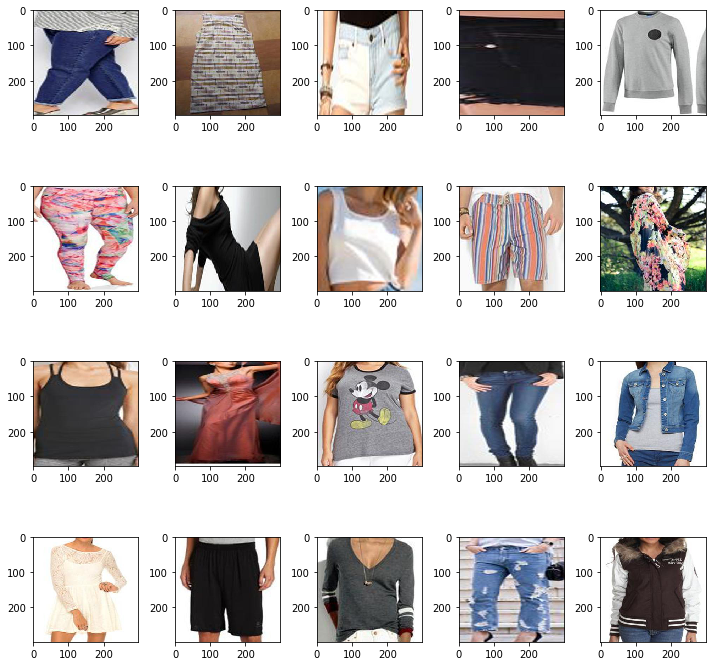

In [4]:
for x_data, t_data in train_generator:
    print('x_data shape : ', x_data.shape) # (20,299,299,3)
    print('t_data shape : ', t_data.shape) # (20,)
    break;

fig = plt.figure(figsize=(10,10))
axs = []

for i in range(20):
    axs.append(fig.add_subplot(4,5,i+1))
    
for x_data, t_data in train_generator:
    for idx, img_data in enumerate(x_data): # idx => 0~19 , img_data =>(150,150,3)
        axs[idx].imshow(img_data)
    print(t_data)
    break;
    
fig.tight_layout()
plt.show()


In [5]:

callbacks_list = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',  # 검증 정확도 모니터링
                                                   patience=1),             # 1 epoch보다 더 길게 정확도 향상되지 않으면 훈련 중지
                  
                  tf.keras.callbacks.ModelCheckpoint(filepath='./classifier_by_attr5_model_1130.h5',
                                                     monitor='val_loss',    # 검증 loss 모니터링
                                                     save_best_only=True),  # 가장 좋은 모델을 저장
                  
                  tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',  # 검증 loss 모니터링
                                                      factor=0.1,           # 콜백 호출시 학습률 10배로 줄임
                                                      patience=5)]          # 검증손실이 해당 epoch만큼 좋아지지 않으면 콜백 호출

In [6]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(299, 299, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.5))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())    
model.add(Dropout(rate=0.5))

model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=230, activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 297, 297, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 148, 148, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 35, 35, 128)       0

In [7]:
model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
history = model.fit(train_generator,
                    steps_per_epoch=(len(train_list)*0.8)/batch_size,
                    epochs=10,
                    callbacks=callbacks_list,
                    validation_data=validation_generator,
                    validation_steps=(len(train_list)*0.2)/batch_size)

Epoch 1/10
 385/5845 [>.............................] - ETA: 6:24 - loss: 4.6976 - accuracy: 0.0619

KeyboardInterrupt: 

In [32]:
# 기학습 된 모델 불러오기
model = tf.keras.models.load_model('./classifier_by_attr5_model_1130.h5')

In [38]:
print(history.history.keys())

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_acc, 'bo', color='r', label='train acc')
plt.plot(val_acc, 'b', color='b', label='validation acc')
plt.title('Training and Validation acc')
plt.legend()
plt.show()

plt.plot(train_loss, 'bo', color='r', label='train loss')
plt.plot(val_loss, 'b', color='b', label='validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

dict_keys(['loss', 'accuracy', 'lr'])


KeyError: 'val_accuracy'